In [1]:
import pandas as pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#load data from folder
data = pandas.read_excel("TitanicAnalysis\data\dataSophie.xlsx")

# Replace unanswered questions with 'none'
data.replace(np.nan, 'None', regex=True)

# alleen geinteresseerd in rijen 1-999 and kolommen 19-999 
# AKA skip first row (question text) and first 19 columns (misc. info)
data = data.iloc[1:999, 19:999]


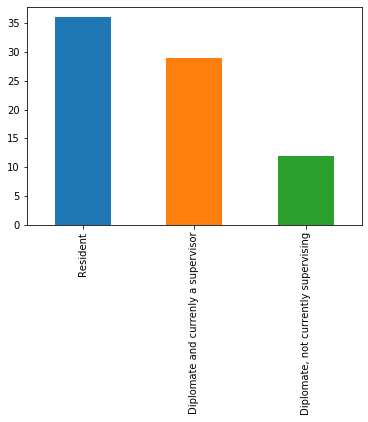

In [7]:
# HISTOGRAM maken

# Sla de data van vraag 1 op in een var genaamd 'Q1',
# Q1 is een zogenaamde 'subset' van de volledige dataset
Q1 = data["Q1"]

# Bar plot onze subset als verticale bars
# kan eventueel ook als 'barh', dan wordt ie horizontaal
Q1.value_counts().plot(kind='bar',  color=['C0', 'C1', 'C2'])

    


C:\Users\frans\miniconda3\envs\myenv\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


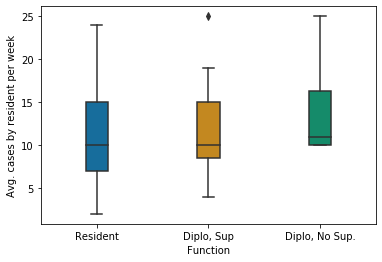

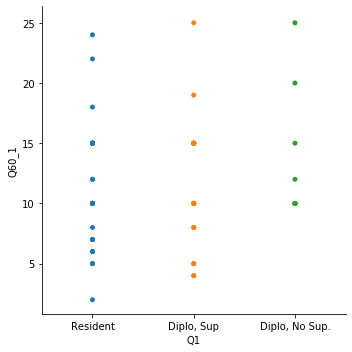

In [13]:
#BOXPLOT/

# Boxplot heeft twee dimensies (columns) nodig, x en y
# in dit geval houdt combi de columns Q1 en Q60_1 vast (een numerieke en een categoriaal)
combi = data[["Q1", "Q60_1"]]


# Optioneel: Verkort de namen van iedere categorie om 'm iets leesbaarder
# te maken. Je kan ook groepen maken (A, B,C of 1, 2, 3) en een legenda provide
combi.replace({'Diplomate and currenly a supervisor': 'Diplo, Sup', 'Diplomate, not currently supervising': 'Diplo, No Sup.'}, inplace=True)

# Knal er een boxplot uit. 
# Bij y en x geef je de column naam aan van de beide axes,
# bij data de gehele dataset waaruit deze columns getrokken moeten worden aha
# Bij .set de label namen die je ziet in de plot
sns.boxplot(y='Q60_1', x='Q1', 
                 data=combi, 
                 width=0.2,
                 palette="colorblind").set(xlabel='Function', ylabel = 'Avg. cases by resident per week')


# Knal er een scatter plotje uit, zelfde als boxplot
sns.catplot(x="Q1", y="Q60_1", jitter=False, data=combi)


In [5]:

# (optioneel) - je kan in plaats van text categories ("resident, "resident and currently a sup", "resident not currently a sup..") 
# nummers geven. Soms is dit handiger. Is niet lastig: 
# 0 = resident, 
# 1 = resident + sup, 
# 2 = resident + geen sup 

# Instructie om subset 'Q1' van hierboven te factorisen
fac = Q1.factorize()[0]

# Nieuwe kolom in de dataset maken en de factorials op te slaan
data["Q1_CATEGORIAL"] = fac

# laat hieronder de takkie zien
data["Q1_CATEGORIAL"]

1     0
2     0
3     0
4     0
5     1
     ..
87    2
88   -1
89    0
90   -1
91    0
Name: Q1_CATEGORIAL, Length: 91, dtype: int64